# Cell 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Superstore Data Analysis")
print("=" * 50)
print("Libraries imported successfully!")

📊 Superstore Data Analysis
Libraries imported successfully!


# Cell 2: Load and Inspect Dataset

In [10]:
# Load the dataset
df = pd.read_csv(r'D:\archive (1)\Sample - Superstore.csv', encoding='ISO-8859-1')



print("Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())


Dataset loaded successfully!
Dataset Shape: (9994, 21)

Column Names:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

First 5 rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consume

# Cell 3: Data Cleaning and Preprocessing

In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Data preprocessing completed!
Date range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00


In [13]:

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [14]:

# Create additional date features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Day_of_Week'] = df['Order Date'].dt.day_name()


In [12]:

# Calculate shipping days
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate profit margin
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

print("Data preprocessing completed!")
print(f"Date range: {df['Order Date'].min()} to {df['Order Date'].max()}")

Data preprocessing completed!
Date range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00


# Cell 4: Dataset Overview and Summary Statistics

In [15]:
print("DATASET OVERVIEW")
print("=" * 40)
print(f"Total Records: {len(df):,}")
print(f"Unique Customers: {df['Customer ID'].nunique():,}")
print(f"Unique Products: {df['Product ID'].nunique():,}")
print(f"Unique Orders: {df['Order ID'].nunique():,}")
print(f"Cities Covered: {df['City'].nunique():,}")
print(f"States Covered: {df['State'].nunique():,}")

DATASET OVERVIEW
Total Records: 9,994
Unique Customers: 793
Unique Products: 1,862
Unique Orders: 5,009
Cities Covered: 531
States Covered: 49


In [16]:
# Display data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Year                      int32
Month                     int32
Quarter                   int32
Day_of_Week              object
Shipping_Days             int64
Profit_Margin           float64
dtype: object


# Cell 5: Key Business Metrics

In [17]:
# Calculate key metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()
avg_order_value = df['Sales'].mean()
avg_profit_margin = df['Profit_Margin'].mean()
total_orders = df['Order ID'].nunique()

print("KEY BUSINESS METRICS")
print("=" * 40)
print(f"💰 Total Sales: ${total_sales:,.2f}")
print(f"📈 Total Profit: ${total_profit:,.2f}")
print(f"📦 Total Quantity Sold: {total_quantity:,} units")
print(f"💵 Average Order Value: ${avg_order_value:.2f}")
print(f"📊 Average Profit Margin: {avg_profit_margin:.2f}%")
print(f"🛒 Total Orders: {total_orders:,}")
print(f"⭐ Profit Ratio: {(total_profit/total_sales)*100:.2f}%")

KEY BUSINESS METRICS
💰 Total Sales: $2,297,200.86
📈 Total Profit: $286,397.02
📦 Total Quantity Sold: 37,873 units
💵 Average Order Value: $229.86
📊 Average Profit Margin: 12.03%
🛒 Total Orders: 5,009
⭐ Profit Ratio: 12.47%


# Cell 6: Descriptive Statistics

In [18]:
print("DESCRIPTIVE STATISTICS")
print("=" * 40)
print(df[['Sales', 'Profit', 'Quantity', 'Discount', 'Profit_Margin']].describe())

DESCRIPTIVE STATISTICS
              Sales       Profit     Quantity     Discount  Profit_Margin
count   9994.000000  9994.000000  9994.000000  9994.000000    9994.000000
mean     229.858001    28.656896     3.789574     0.156203      12.031393
std      623.245101   234.260108     2.225110     0.206452      46.675435
min        0.444000 -6599.978000     1.000000     0.000000    -275.000000
25%       17.280000     1.728750     2.000000     0.000000       7.500000
50%       54.490000     8.666500     3.000000     0.200000      27.000000
75%      209.940000    29.364000     5.000000     0.200000      36.250000
max    22638.480000  8399.976000    14.000000     0.800000      50.000000


# Cell 7: Sales Analysis by Category

In [19]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Sales Distribution by Category')

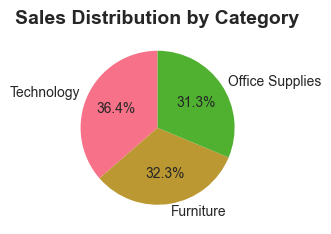

In [20]:
# Sales by Category
plt.subplot(2, 2, 1)
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category', fontsize=14, fontweight='bold')

Text(0.5, 0, 'Sales ($)')

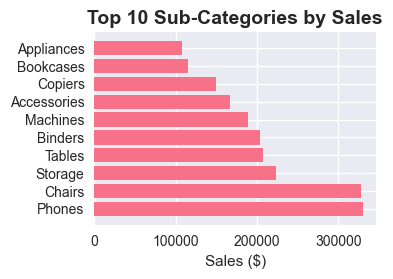

In [21]:
# Sales by Sub-Category (Top 10)
plt.subplot(2, 2, 2)
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.barh(range(len(subcategory_sales)), subcategory_sales.values)
plt.yticks(range(len(subcategory_sales)), subcategory_sales.index)
plt.title('Top 10 Sub-Categories by Sales', fontsize=14, fontweight='bold')
plt.xlabel('Sales ($)')

([0, 1, 2],
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

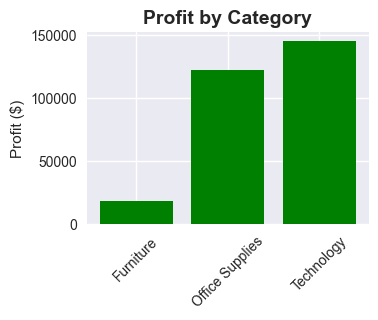

In [22]:
# Profit by Category
plt.subplot(2, 2, 3)
category_profit = df.groupby('Category')['Profit'].sum()
colors = ['green' if x > 0 else 'red' for x in category_profit.values]
plt.bar(category_profit.index, category_profit.values, color=colors)
plt.title('Profit by Category', fontsize=14, fontweight='bold')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)

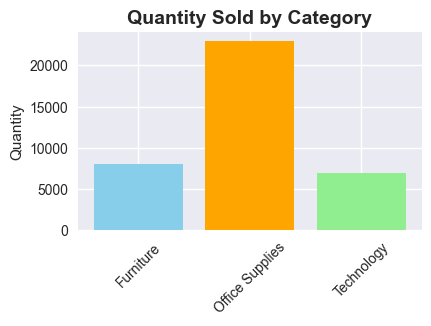

In [23]:
# Quantity by Category
plt.subplot(2, 2, 4)
category_quantity = df.groupby('Category')['Quantity'].sum()
plt.bar(category_quantity.index, category_quantity.values, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Quantity Sold by Category', fontsize=14, fontweight='bold')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Cell 8: Geographic Analysis

In [24]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

([0, 1, 2, 3],
 [Text(0, 0, 'West'),
  Text(1, 0, 'East'),
  Text(2, 0, 'Central'),
  Text(3, 0, 'South')])

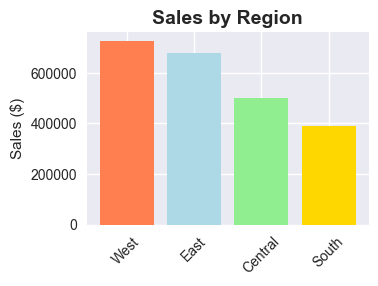

In [25]:
# Sales by Region
plt.subplot(2, 2, 1)
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.bar(region_sales.index, region_sales.values, color=['coral', 'lightblue', 'lightgreen', 'gold'])
plt.title('Sales by Region', fontsize=14, fontweight='bold')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)

Text(0.5, 0, 'Sales ($)')

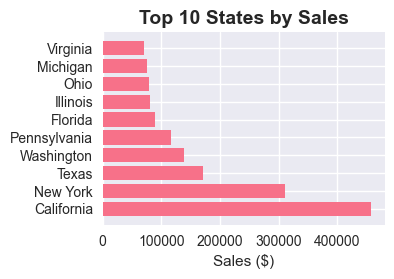

In [26]:
# Top 10 States by Sales
plt.subplot(2, 2, 2)
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.barh(range(len(state_sales)), state_sales.values)
plt.yticks(range(len(state_sales)), state_sales.index)
plt.title('Top 10 States by Sales', fontsize=14, fontweight='bold')
plt.xlabel('Sales ($)')

Text(0.5, 0, 'Sales ($)')

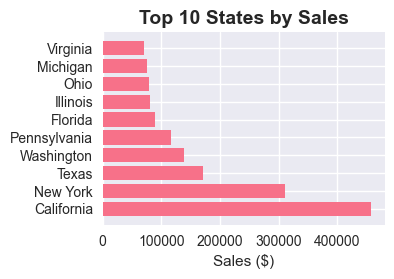

In [27]:
# Top 10 States by Sales
plt.subplot(2, 2, 2)
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.barh(range(len(state_sales)), state_sales.values)
plt.yticks(range(len(state_sales)), state_sales.index)
plt.title('Top 10 States by Sales', fontsize=14, fontweight='bold')
plt.xlabel('Sales ($)')

Text(0.5, 0, 'Sales ($)')

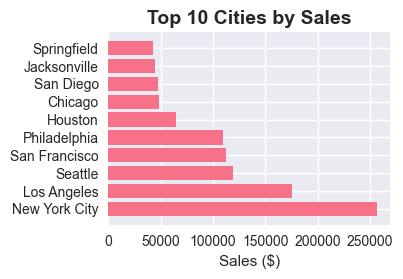

In [28]:
# Top 10 Cities by Sales
plt.subplot(2, 2, 3)
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.barh(range(len(city_sales)), city_sales.values)
plt.yticks(range(len(city_sales)), city_sales.index)
plt.title('Top 10 Cities by Sales', fontsize=14, fontweight='bold')
plt.xlabel('Sales ($)')

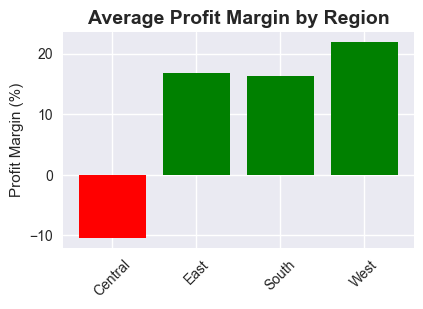

In [29]:
# Region vs Profit Margin
plt.subplot(2, 2, 4)
region_profit_margin = df.groupby('Region')['Profit_Margin'].mean()
colors = ['green' if x > 0 else 'red' for x in region_profit_margin.values]
plt.bar(region_profit_margin.index, region_profit_margin.values, color=colors)
plt.title('Average Profit Margin by Region', fontsize=14, fontweight='bold')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Cell 9: Customer Segment Analysis

In [ ]:
plt.figure(figsize=(15, 8))


Text(0.5, 1.0, 'Sales Distribution by Segment')

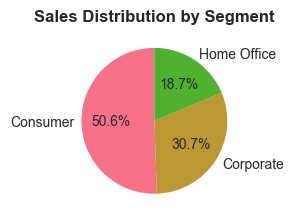

In [30]:
# Sales by Segment
plt.subplot(2, 3, 1)
segment_sales = df.groupby('Segment')['Sales'].sum()
plt.pie(segment_sales.values, labels=segment_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Segment', fontsize=12, fontweight='bold')

([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

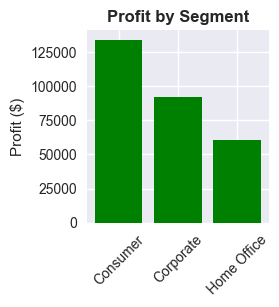

In [31]:
# Profit by Segment
plt.subplot(2, 3, 2)
segment_profit = df.groupby('Segment')['Profit'].sum()
colors = ['green' if x > 0 else 'red' for x in segment_profit.values]
plt.bar(segment_profit.index, segment_profit.values, color=colors)
plt.title('Profit by Segment', fontsize=12, fontweight='bold')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

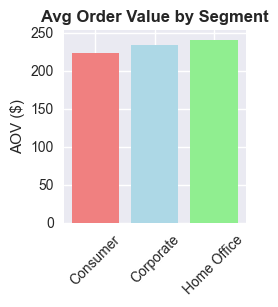

In [32]:
# Average Order Value by Segment
plt.subplot(2, 3, 3)
segment_aov = df.groupby('Segment')['Sales'].mean()
plt.bar(segment_aov.index, segment_aov.values, color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Avg Order Value by Segment', fontsize=12, fontweight='bold')
plt.ylabel('AOV ($)')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

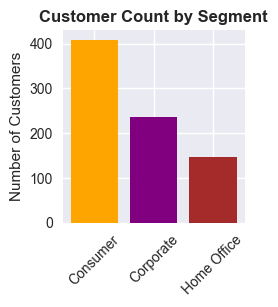

In [33]:
# Customer Count by Segment
plt.subplot(2, 3, 4)
segment_customers = df.groupby('Segment')['Customer ID'].nunique()
plt.bar(segment_customers.index, segment_customers.values, color=['orange', 'purple', 'brown'])
plt.title('Customer Count by Segment', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)


([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

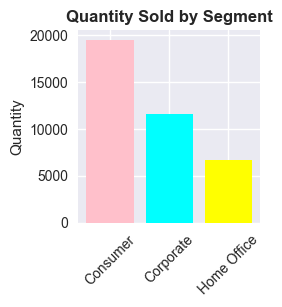

In [34]:
# Quantity by Segment
plt.subplot(2, 3, 5)
segment_quantity = df.groupby('Segment')['Quantity'].sum()
plt.bar(segment_quantity.index, segment_quantity.values, color=['pink', 'cyan', 'yellow'])
plt.title('Quantity Sold by Segment', fontsize=12, fontweight='bold')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

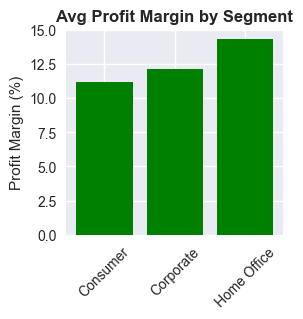

In [35]:
# Profit Margin by Segment
plt.subplot(2, 3, 6)
segment_margin = df.groupby('Segment')['Profit_Margin'].mean()
colors = ['green' if x > 0 else 'red' for x in segment_margin.values]
plt.bar(segment_margin.index, segment_margin.values, color=colors)
plt.title('Avg Profit Margin by Segment', fontsize=12, fontweight='bold')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Cell 10: Time Series Analysis

In [36]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

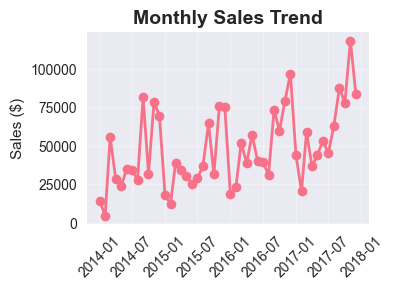

In [37]:
# Monthly Sales Trend
plt.subplot(2, 2, 1)
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

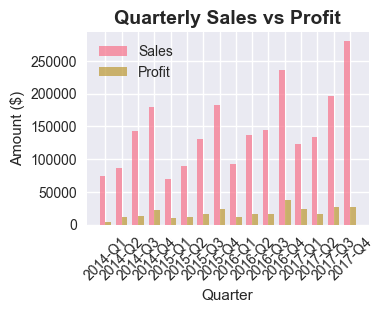

In [38]:
# Quarterly Performance
plt.subplot(2, 2, 2)
quarterly_data = df.groupby(['Year', 'Quarter']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()
quarterly_data['Period'] = quarterly_data['Year'].astype(str) + '-Q' + quarterly_data['Quarter'].astype(str)

x = range(len(quarterly_data))
width = 0.35
plt.bar([i - width/2 for i in x], quarterly_data['Sales'], width, label='Sales', alpha=0.7)
plt.bar([i + width/2 for i in x], quarterly_data['Profit'], width, label='Profit', alpha=0.7)
plt.xlabel('Quarter')
plt.ylabel('Amount ($)')
plt.title('Quarterly Sales vs Profit', fontsize=14, fontweight='bold')
plt.xticks(x, quarterly_data['Period'], rotation=45)
plt.legend()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

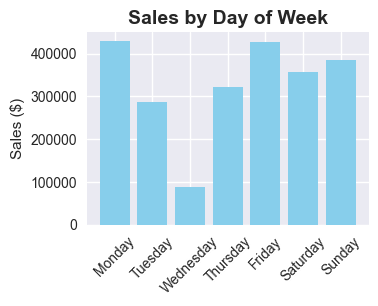

In [39]:
# Day of Week Analysis
plt.subplot(2, 2, 3)
dow_sales = df.groupby('Day_of_Week')['Sales'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = dow_sales.reindex(days_order)
plt.bar(dow_sales.index, dow_sales.values, color='skyblue')
plt.title('Sales by Day of Week', fontsize=14, fontweight='bold')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)

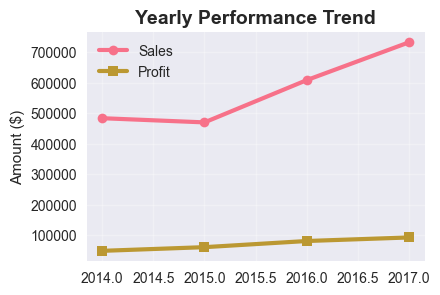

In [40]:
# Yearly Comparison
plt.subplot(2, 2, 4)
yearly_data = df.groupby('Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

plt.plot(yearly_data['Year'], yearly_data['Sales'], marker='o', label='Sales', linewidth=3)
plt.plot(yearly_data['Year'], yearly_data['Profit'], marker='s', label='Profit', linewidth=3)
plt.title('Yearly Performance Trend', fontsize=14, fontweight='bold')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 11: Shipping Analysis

In [41]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'Sales by Shipping Mode')

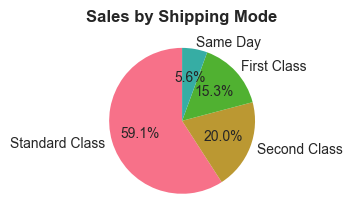

In [42]:
# Shipping Mode Analysis
plt.subplot(2, 3, 1)
shipping_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
plt.pie(shipping_sales.values, labels=shipping_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Shipping Mode', fontsize=12, fontweight='bold')

([0, 1, 2, 3],
 [Text(0, 0, 'Same Day'),
  Text(1, 0, 'First Class'),
  Text(2, 0, 'Second Class'),
  Text(3, 0, 'Standard Class')])

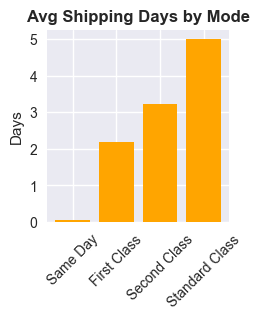

In [43]:
# Average Shipping Days by Mode
plt.subplot(2, 3, 2)
shipping_days = df.groupby('Ship Mode')['Shipping_Days'].mean().sort_values()
plt.bar(shipping_days.index, shipping_days.values, color='orange')
plt.title('Avg Shipping Days by Mode', fontsize=12, fontweight='bold')
plt.ylabel('Days')
plt.xticks(rotation=45)

Text(0, 0.5, 'Frequency')

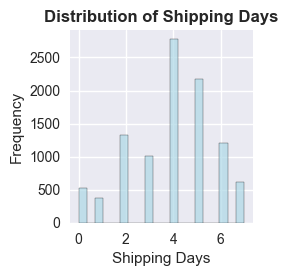

In [44]:
# Shipping Days Distribution
plt.subplot(2, 3, 3)
plt.hist(df['Shipping_Days'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Shipping Days', fontsize=12, fontweight='bold')
plt.xlabel('Shipping Days')
plt.ylabel('Frequency')

([0, 1, 2, 3],
 [Text(0, 0, 'First Class'),
  Text(1, 0, 'Same Day'),
  Text(2, 0, 'Second Class'),
  Text(3, 0, 'Standard Class')])

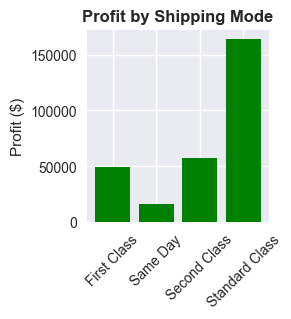

In [45]:
# Profit by Shipping Mode
plt.subplot(2, 3, 4)
shipping_profit = df.groupby('Ship Mode')['Profit'].sum()
colors = ['green' if x > 0 else 'red' for x in shipping_profit.values]
plt.bar(shipping_profit.index, shipping_profit.values, color=colors)
plt.title('Profit by Shipping Mode', fontsize=12, fontweight='bold')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'First Class'),
  Text(1, 0, 'Same Day'),
  Text(2, 0, 'Second Class'),
  Text(3, 0, 'Standard Class')])

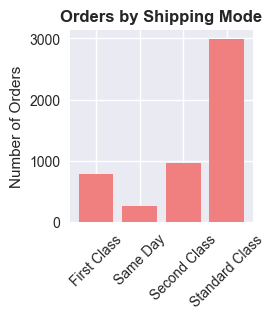

In [46]:
# Orders by Shipping Mode
plt.subplot(2, 3, 5)
shipping_orders = df.groupby('Ship Mode')['Order ID'].nunique()
plt.bar(shipping_orders.index, shipping_orders.values, color='lightcoral')
plt.title('Orders by Shipping Mode', fontsize=12, fontweight='bold')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

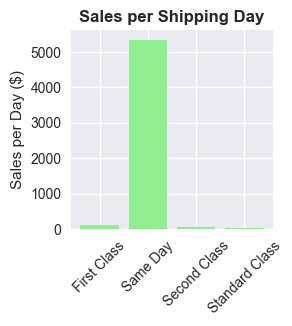

In [47]:
# Shipping Cost Analysis (Avg Sales per Shipping Day)
plt.subplot(2, 3, 6)
shipping_efficiency = df.groupby('Ship Mode').apply(lambda x: x['Sales'].sum() / x['Shipping_Days'].sum())
plt.bar(shipping_efficiency.index, shipping_efficiency.values, color='lightgreen')
plt.title('Sales per Shipping Day', fontsize=12, fontweight='bold')
plt.ylabel('Sales per Day ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Cell 12: Product Performance Analysis

In [48]:
# Top and Bottom Performing Products
print("TOP PERFORMING PRODUCTS")
print("=" * 50)

top_products_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

print("Top 10 Products by Sales:")
for i, (product, sales) in enumerate(top_products_sales.items(), 1):
    print(f"{i:2d}. {product[:50]}... ${sales:,.2f}")

print("\nTop 10 Products by Profit:")
for i, (product, profit) in enumerate(top_products_profit.items(), 1):
    print(f"{i:2d}. {product[:50]}... ${profit:,.2f}")

TOP PERFORMING PRODUCTS
Top 10 Products by Sales:
 1. Canon imageCLASS 2200 Advanced Copier... $61,599.82
 2. Fellowes PB500 Electric Punch Plastic Comb Binding... $27,453.38
 3. Cisco TelePresence System EX90 Videoconferencing U... $22,638.48
 4. HON 5400 Series Task Chairs for Big and Tall... $21,870.58
 5. GBC DocuBind TL300 Electric Binding System... $19,823.48
 6. GBC Ibimaster 500 Manual ProClick Binding System... $19,024.50
 7. Hewlett Packard LaserJet 3310 Copier... $18,839.69
 8. HP Designjet T520 Inkjet Large Format Printer - 24... $18,374.90
 9. GBC DocuBind P400 Electric Binding System... $17,965.07
10. High Speed Automatic Electric Letter Opener... $17,030.31

Top 10 Products by Profit:
 1. Canon imageCLASS 2200 Advanced Copier... $25,199.93
 2. Fellowes PB500 Electric Punch Plastic Comb Binding... $7,753.04
 3. Hewlett Packard LaserJet 3310 Copier... $6,983.88
 4. Canon PC1060 Personal Laser Copier... $4,570.93
 5. HP Designjet T520 Inkjet Large Format Printer - 24... $4,

In [49]:
# Bottom performing products (losses)
print("\nWORST PERFORMING PRODUCTS (Losses)")
print("=" * 50)
worst_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
for i, (product, profit) in enumerate(worst_products.items(), 1):
    print(f"{i:2d}. {product[:50]}... ${profit:,.2f}")


WORST PERFORMING PRODUCTS (Losses)
 1. Cubify CubeX 3D Printer Double Head Print... $-8,879.97
 2. Lexmark MX611dhe Monochrome Laser Printer... $-4,589.97
 3. Cubify CubeX 3D Printer Triple Head Print... $-3,839.99
 4. Chromcraft Bull-Nose Wood Oval Conference Tables &... $-2,876.12
 5. Bush Advantage Collection Racetrack Conference Tab... $-1,934.40
 6. GBC DocuBind P400 Electric Binding System... $-1,878.17
 7. Cisco TelePresence System EX90 Videoconferencing U... $-1,811.08
 8. Martin Yale Chadless Opener Electric Letter Opener... $-1,299.18
 9. Balt Solid Wood Round Tables... $-1,201.06
10. BoxOffice By Design Rectangular and Half-Moon Meet... $-1,148.44


# Cell 13: Discount Analysis

In [50]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

Text(0, 0.5, 'Frequency')

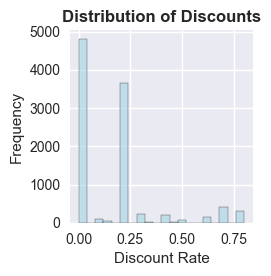

In [51]:
# Discount Distribution
plt.subplot(2, 3, 1)
plt.hist(df['Discount'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Discounts', fontsize=12, fontweight='bold')
plt.xlabel('Discount Rate')
plt.ylabel('Frequency')

Text(0, 0.5, 'Sales ($)')

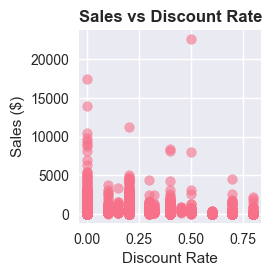

In [52]:
# Sales vs Discount
plt.subplot(2, 3, 2)
plt.scatter(df['Discount'], df['Sales'], alpha=0.6)
plt.title('Sales vs Discount Rate', fontsize=12, fontweight='bold')
plt.xlabel('Discount Rate')
plt.ylabel('Sales ($)')

Text(0, 0.5, 'Profit ($)')

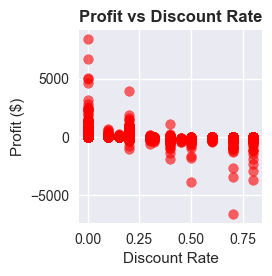

In [53]:
# Profit vs Discount
plt.subplot(2, 3, 3)
plt.scatter(df['Discount'], df['Profit'], alpha=0.6, color='red')
plt.title('Profit vs Discount Rate', fontsize=12, fontweight='bold')
plt.xlabel('Discount Rate')
plt.ylabel('Profit ($)')

([0, 1, 2],
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

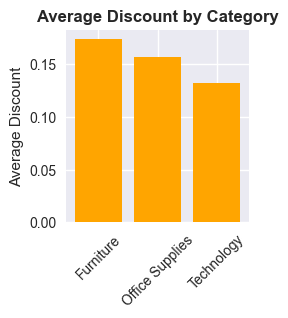

In [54]:
# Discount by Category
plt.subplot(2, 3, 4)
category_discount = df.groupby('Category')['Discount'].mean()
plt.bar(category_discount.index, category_discount.values, color='orange')
plt.title('Average Discount by Category', fontsize=12, fontweight='bold')
plt.ylabel('Average Discount')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Very Low'),
  Text(1, 0, 'Low'),
  Text(2, 0, 'Medium'),
  Text(3, 0, 'High'),
  Text(4, 0, 'Very High')])

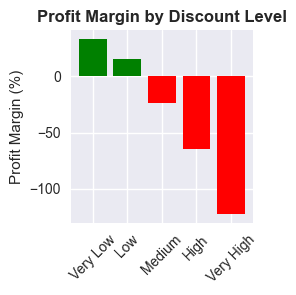

In [55]:
# Discount Impact on Profit Margin
plt.subplot(2, 3, 5)
discount_bins = pd.cut(df['Discount'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
discount_profit_margin = df.groupby(discount_bins)['Profit_Margin'].mean()
colors = ['green' if x > 0 else 'red' for x in discount_profit_margin.values]
plt.bar(discount_profit_margin.index, discount_profit_margin.values, color=colors)
plt.title('Profit Margin by Discount Level', fontsize=12, fontweight='bold')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)

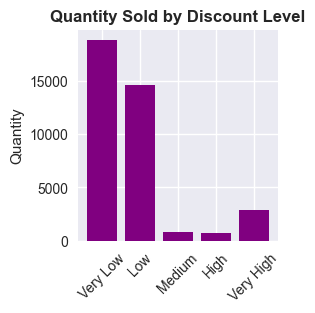

In [56]:
# Sales Volume by Discount Level
plt.subplot(2, 3, 6)
discount_quantity = df.groupby(discount_bins)['Quantity'].sum()
plt.bar(discount_quantity.index, discount_quantity.values, color='purple')
plt.title('Quantity Sold by Discount Level', fontsize=12, fontweight='bold')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Cell 14: Customer Analysis

In [57]:
print("CUSTOMER ANALYSIS")
print("=" * 40)

CUSTOMER ANALYSIS


In [58]:
# Customer metrics
customer_metrics = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Order ID': 'nunique'
}).rename(columns={'Order ID': 'Orders'})

customer_metrics['AOV'] = customer_metrics['Sales'] / customer_metrics['Orders']
customer_metrics['Profit_Margin'] = (customer_metrics['Profit'] / customer_metrics['Sales']) * 100

print("Customer Statistics:")
print(customer_metrics.describe())

Customer Statistics:
              Sales       Profit    Quantity      Orders          AOV  \
count    793.000000   793.000000  793.000000  793.000000   793.000000   
mean    2896.848500   361.156396   47.759142    6.316520   460.147734   
std     2628.670117   894.261812   24.842915    2.550885   433.400951   
min        4.833000 -6626.389500    2.000000    1.000000     2.416500   
25%     1146.050000    36.613100   30.000000    5.000000   213.255333   
50%     2256.394000   227.833800   44.000000    6.000000   362.503250   
75%     3785.276000   560.007800   63.000000    8.000000   550.377000   
max    25043.050000  8981.323900  150.000000   17.000000  5008.610000   

       Profit_Margin  
count     793.000000  
mean       11.024176  
std        19.181878  
min      -116.455632  
25%         4.180599  
50%        14.415313  
75%        22.331948  
max        47.530536  


In [59]:
# Top customers
print("\nTop 10 Customers by Sales:")
top_customers = customer_metrics.sort_values('Sales', ascending=False).head(10)
for i, (customer_id, data) in enumerate(top_customers.iterrows(), 1):
    customer_name = df[df['Customer ID'] == customer_id]['Customer Name'].iloc[0]
    print(f"{i:2d}. {customer_name} - ${data['Sales']:,.2f}")


Top 10 Customers by Sales:
 1. Sean Miller - $25,043.05
 2. Tamara Chand - $19,052.22
 3. Raymond Buch - $15,117.34
 4. Tom Ashbrook - $14,595.62
 5. Adrian Barton - $14,473.57
 6. Ken Lonsdale - $14,175.23
 7. Sanjit Chand - $14,142.33
 8. Hunter Lopez - $12,873.30
 9. Sanjit Engle - $12,209.44
10. Christopher Conant - $12,129.07


# Cell 15: Correlation Analysis

In [60]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [61]:
# Create correlation matrix
correlation_vars = ['Sales', 'Profit', 'Quantity', 'Discount', 'Profit_Margin', 'Shipping_Days']
correlation_matrix = df[correlation_vars].corr()

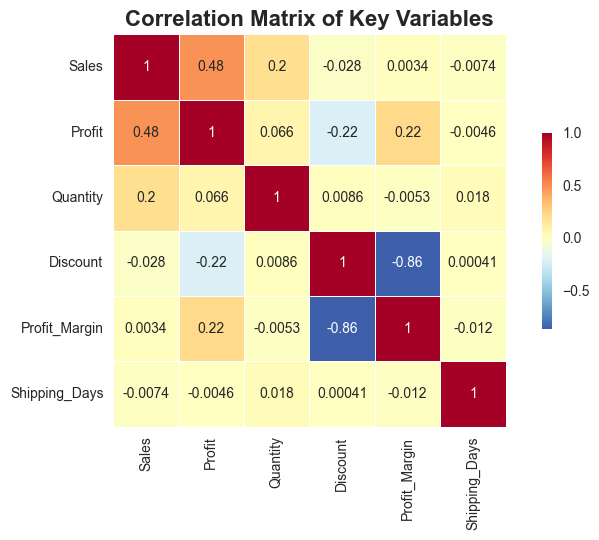

In [62]:
# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Key Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Cell 16: Advanced Analytics - RFM Analysis (Simplified)

In [63]:
print("RFM ANALYSIS (Recency, Frequency, Monetary)")
print("=" * 50)

RFM ANALYSIS (Recency, Frequency, Monetary)


In [64]:
# Calculate RFM metrics
current_date = df['Order Date'].max()
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,  # Recency
    'Order ID': 'nunique',  # Frequency
    'Sales': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

In [65]:
# Add customer names
rfm = rfm.merge(df[['Customer ID', 'Customer Name']].drop_duplicates(), on='Customer ID', how='left')


In [71]:
# Create RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print("RFM Analysis Summary:")
print(f"Average Recency: {rfm['Recency'].mean():.1f} days")
print(f"Average Frequency: {rfm['Frequency'].mean():.1f} orders")
print(f"Average Monetary: ${rfm['Monetary'].mean():.2f}")

print("\nTop 10 Customers by RFM Score:")
top_rfm = rfm.sort_values(['R_Score', 'F_Score', 'M_Score'], ascending=[False, False, False]).head(10)
for i, row in top_rfm.iterrows():
    print(f"{i+1:2d}. {row['Customer Name']} - RFM: {row['RFM_Score']} (${row['Monetary']:,.2f})")



RFM Analysis Summary:
Average Recency: 146.8 days
Average Frequency: 6.3 orders
Average Monetary: $2896.85

Top 10 Customers by RFM Score:
35. Anna Häberlin - RFM: 155 ($7,888.29)
153. Clay Ludtke - RFM: 155 ($10,880.55)
233. Dennis Pardue - RFM: 155 ($5,480.72)
350. Jonathan Doherty - RFM: 155 ($7,610.86)
537. Maribeth Schnelling - RFM: 155 ($7,443.69)
670. Sanjit Chand - RFM: 155 ($14,142.33)
722. Stewart Visinsky - RFM: 154 ($4,105.31)
418. Ken Black - RFM: 153 ($2,744.74)
464. Logan Haushalter - RFM: 153 ($1,739.69)
570. Neoma Murray - RFM: 153 ($2,161.98)


# Cell 17: Business Insights and Recommendations

In [72]:
print("🎯 KEY BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

🎯 KEY BUSINESS INSIGHTS & RECOMMENDATIONS


In [73]:
# Calculate insights
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

In [74]:
# Category insights
best_category = df.groupby('Category')['Profit'].sum().idxmax()
worst_category = df.groupby('Category')['Profit'].sum().idxmin()

In [75]:
# Regional insights
best_region = df.groupby('Region')['Sales'].sum().idxmax()
best_segment = df.groupby('Segment')['Profit'].sum().idxmax()

In [76]:
# Product insights
loss_making_products = len(df.groupby('Product Name')['Profit'].sum()[df.groupby('Product Name')['Profit'].sum() < 0])
total_products = df['Product Name'].nunique()

print("📊 PERFORMANCE INSIGHTS:")
print(f"• Overall profit margin is {profit_margin:.2f}%")
print(f"• {best_category} is the most profitable category")
print(f"• {worst_category} category needs attention (lowest profit)")
print(f"• {best_region} region generates highest sales")
print(f"• {best_segment} segment is most profitable")
print(f"• {loss_making_products} out of {total_products} products are making losses")

discount_impact = df[df['Discount'] > 0]['Profit'].sum() / df[df['Discount'] == 0]['Profit'].sum()
high_discount = len(df[df['Discount'] > 0.5]) / len(df) * 100

print(f"\n💰 PRICING INSIGHTS:")
print(f"• {high_discount:.1f}% of orders have high discounts (>50%)")
if discount_impact < 1:
    print("• High discounts are negatively impacting profitability")
else:
    print("• Discount strategy appears to be working")

print(f"\n🚚 OPERATIONAL INSIGHTS:")
avg_shipping = df['Shipping_Days'].mean()
print(f"• Average shipping time: {avg_shipping:.1f} days")
same_day_orders = len(df[df['Shipping_Days'] == 0])
print(f"• {same_day_orders} orders shipped same day")

print(f"\n🎯 STRATEGIC RECOMMENDATIONS:")
print("1. PRODUCT STRATEGY:")
print(f"   • Focus on {best_category} category expansion")
print(f"   • Review and optimize {loss_making_products} loss-making products")
print("   • Consider discontinuing consistently unprofitable items")

print("\n2. REGIONAL STRATEGY:")
print(f"   • Invest more marketing budget in {best_region} region")
print("   • Analyze underperforming regions for improvement opportunities")

print("\n3. CUSTOMER STRATEGY:")
print(f"   • Prioritize {best_segment} segment for retention campaigns")
print("   • Develop targeted offers for high-value customers")
print("   • Implement customer loyalty programs")

print("\n4. PRICING STRATEGY:")
print("   • Review discount policies - high discounts may be hurting profits")
print("   • Implement dynamic pricing based on demand and inventory")
print("   • Test price elasticity for key products")

print("\n5. OPERATIONAL EFFICIENCY:")
print("   • Optimize shipping processes to reduce delivery times")
print("   • Negotiate better rates with shipping partners")
print("   • Consider offering premium shipping options")


📊 PERFORMANCE INSIGHTS:
• Overall profit margin is 12.47%
• Technology is the most profitable category
• Furniture category needs attention (lowest profit)
• West region generates highest sales
• Consumer segment is most profitable
• 301 out of 1850 products are making losses

💰 PRICING INSIGHTS:
• 8.6% of orders have high discounts (>50%)
• High discounts are negatively impacting profitability

🚚 OPERATIONAL INSIGHTS:
• Average shipping time: 4.0 days
• 519 orders shipped same day

🎯 STRATEGIC RECOMMENDATIONS:
1. PRODUCT STRATEGY:
   • Focus on Technology category expansion
   • Review and optimize 301 loss-making products
   • Consider discontinuing consistently unprofitable items

2. REGIONAL STRATEGY:
   • Invest more marketing budget in West region
   • Analyze underperforming regions for improvement opportunities

3. CUSTOMER STRATEGY:
   • Prioritize Consumer segment for retention campaigns
   • Develop targeted offers for high-value customers
   • Implement customer loyalty pro

# Cell 18: Executive Summary Dashboard

Text(0.5, 0.98, '📊 EXECUTIVE DASHBOARD - KEY METRICS OVERVIEW')

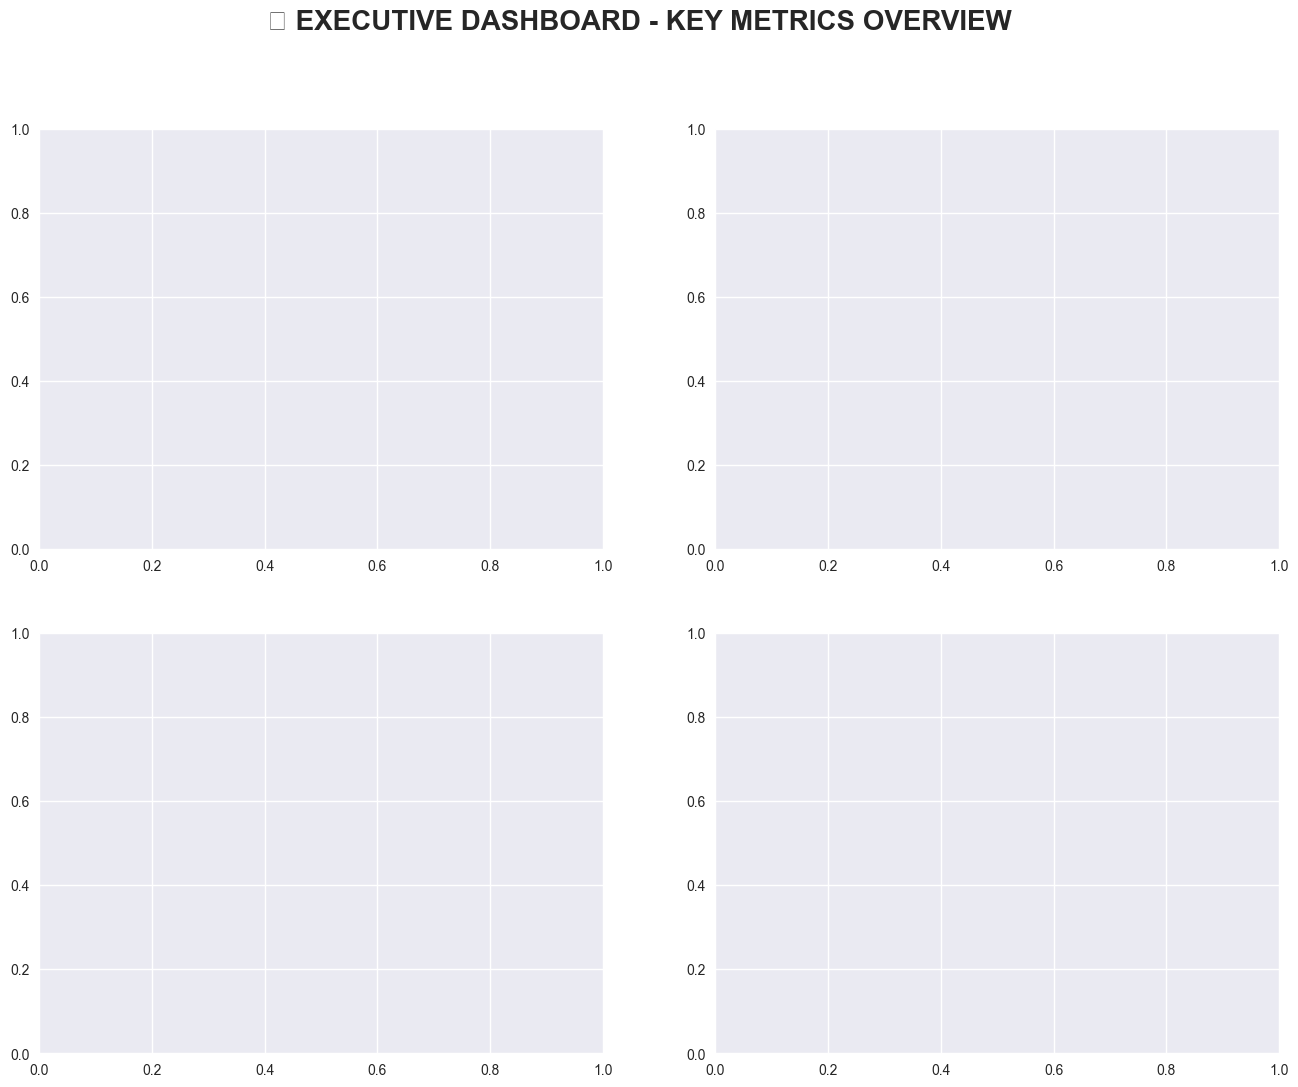

In [77]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 EXECUTIVE DASHBOARD - KEY METRICS OVERVIEW', fontsize=20, fontweight='bold', y=0.98)

In [78]:
# Sales by Category (Pie Chart)
category_sales = df.groupby('Category')['Sales'].sum()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
wedges, texts, autotexts = ax1.pie(category_sales.values, labels=category_sales.index, 
                                   autopct='%1.1f%%', startangle=90, colors=colors)
ax1.set_title('Sales Distribution by Category', fontsize=14, fontweight='bold', pad=20)

Text(0.5, 1.0, 'Sales Distribution by Category')

In [79]:
# Monthly Sales Trend
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
ax2.plot(monthly_sales.index.astype(str), monthly_sales.values, 
         marker='o', linewidth=3, markersize=8, color='#45B7D1')
ax2.set_title('Monthly Sales Trend', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Sales ($)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

In [80]:
# Regional Performance
region_data = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'})
x = np.arange(len(region_data))
width = 0.35
bars1 = ax3.bar(x - width/2, region_data['Sales'], width, label='Sales', color='#4ECDC4', alpha=0.8)
bars2 = ax3.bar(x + width/2, region_data['Profit'], width, label='Profit', color='#FF6B6B', alpha=0.8)
ax3.set_title('Regional Performance: Sales vs Profit', fontsize=14, fontweight='bold', pad=20)
ax3.set_ylabel('Amount ($)', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(region_data.index, rotation=45)
ax3.legend()

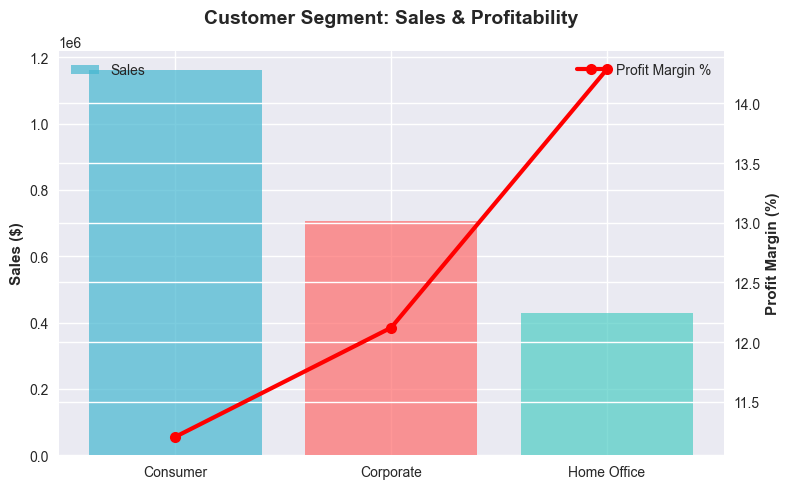

In [85]:
# Calculate profit margin if not done yet
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

# Aggregate metrics by segment
segment_metrics = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Customer ID': 'nunique',
    'Profit_Margin': 'mean'
})

# Create figure and axes
fig, ax4 = plt.subplots(figsize=(8, 5))
ax4_twin = ax4.twinx()

# Plot bars and line on twin axes
bars = ax4.bar(segment_metrics.index, segment_metrics['Sales'], 
               color=['#45B7D1', '#FF6B6B', '#4ECDC4'], alpha=0.7, label='Sales')
line = ax4_twin.plot(segment_metrics.index, segment_metrics['Profit_Margin'], 
                     'ro-', linewidth=3, markersize=8, label='Profit Margin %')

# Set titles and labels
ax4.set_title('Customer Segment: Sales & Profitability', fontsize=14, fontweight='bold', pad=20)
ax4.set_ylabel('Sales ($)', fontweight='bold')
ax4_twin.set_ylabel('Profit Margin (%)', fontweight='bold')

# Legends
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()


# Cell 19: Statistical Testing and Advanced Insights

In [86]:
print("\n🔬 STATISTICAL ANALYSIS & ADVANCED INSIGHTS")
print("=" * 60)



🔬 STATISTICAL ANALYSIS & ADVANCED INSIGHTS


In [87]:
# Statistical tests
from scipy import stats

In [89]:
# Test 1: ANOVA - Sales difference across categories
categories = df['Category'].unique()
category_sales = [df[df['Category'] == cat]['Sales'].values for cat in categories]
f_stat, p_value = stats.f_oneway(*category_sales)

print("📈 STATISTICAL TESTS:")
print(f"• ANOVA Test - Sales across Categories:")
print(f"  F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("  Result: Significant difference in sales across categories")
else:
    print("  Result: No significant difference in sales across categories")

📈 STATISTICAL TESTS:
• ANOVA Test - Sales across Categories:
  F-statistic: 265.4898, p-value: 0.0000
  Result: Significant difference in sales across categories


In [90]:
# Test 2: Correlation between Discount and Profit
corr_coef, p_val = stats.pearsonr(df['Discount'], df['Profit'])
print(f"\n• Correlation - Discount vs Profit:")
print(f"  Correlation coefficient: {corr_coef:.4f}, p-value: {p_val:.4f}")
if abs(corr_coef) > 0.3:
    direction = "positive" if corr_coef > 0 else "negative"
    print(f"  Result: Strong {direction} correlation between discount and profit")
else:
    print("  Result: Weak correlation between discount and profit")


• Correlation - Discount vs Profit:
  Correlation coefficient: -0.2195, p-value: 0.0000
  Result: Weak correlation between discount and profit


In [91]:
# Test 3: Regional profit margin comparison
regions = df['Region'].unique()
region_margins = [df[df['Region'] == reg]['Profit_Margin'].values for reg in regions]
f_stat_region, p_val_region = stats.f_oneway(*region_margins)

print(f"\n• ANOVA Test - Profit Margins across Regions:")
print(f"  F-statistic: {f_stat_region:.4f}, p-value: {p_val_region:.4f}")
if p_val_region < 0.05:
    print("  Result: Significant difference in profit margins across regions")
else:
    print("  Result: No significant difference in profit margins across regions")



• ANOVA Test - Profit Margins across Regions:
  F-statistic: 260.1513, p-value: 0.0000
  Result: Significant difference in profit margins across regions


# Cell 20: Seasonality Analysis

In [92]:
print("\n📅 SEASONALITY ANALYSIS")
print("=" * 40)



📅 SEASONALITY ANALYSIS


In [93]:
# Create seasonal metrics
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

seasonal_analysis = df.groupby('Season').agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Quantity': 'sum',
    'Order ID': 'nunique'
}).round(2)

print("Seasonal Performance Summary:")
print(seasonal_analysis)


Seasonal Performance Summary:
            Sales             Profit        Quantity Order ID
              sum    mean        sum   mean      sum  nunique
Season                                                       
Fall    860434.00  234.26  104109.94  28.34    13941     1858
Spring  497796.43  237.16   62593.43  29.82     7802     1066
Summer  459000.84  215.19   56895.40  26.67     8169     1043
Winter  479969.59  229.76   62798.25  30.06     7961     1042


In [94]:
# Best and worst seasons
best_season_sales = df.groupby('Season')['Sales'].sum().idxmax()
worst_season_sales = df.groupby('Season')['Sales'].sum().idxmin()
best_season_profit = df.groupby('Season')['Profit'].sum().idxmax()

print(f"\n• Best season for sales: {best_season_sales}")
print(f"• Worst season for sales: {worst_season_sales}")
print(f"• Best season for profit: {best_season_profit}")


• Best season for sales: Fall
• Worst season for sales: Summer
• Best season for profit: Fall


# Cell 21: Market Basket Analysis (Simplified)

In [95]:
print("\n🛒 MARKET BASKET ANALYSIS")
print("=" * 40)


🛒 MARKET BASKET ANALYSIS


In [96]:
# Analyze orders with multiple items
order_items = df.groupby('Order ID').agg({
    'Product Name': 'count',
    'Category': lambda x: ', '.join(x.unique()),
    'Sales': 'sum',
    'Profit': 'sum'
}).rename(columns={'Product Name': 'Item_Count'})

multi_item_orders = order_items[order_items['Item_Count'] > 1]
single_item_orders = order_items[order_items['Item_Count'] == 1]

print(f"Total Orders: {len(order_items)}")
print(f"Single-item Orders: {len(single_item_orders)} ({len(single_item_orders)/len(order_items)*100:.1f}%)")
print(f"Multi-item Orders: {len(multi_item_orders)} ({len(multi_item_orders)/len(order_items)*100:.1f}%)")

if len(multi_item_orders) > 0:
    print(f"\nMulti-item Order Insights:")
    print(f"• Average items per multi-item order: {multi_item_orders['Item_Count'].mean():.1f}")
    print(f"• Average value of multi-item orders: ${multi_item_orders['Sales'].mean():.2f}")
    print(f"• Average value of single-item orders: ${single_item_orders['Sales'].mean():.2f}")

Total Orders: 5009
Single-item Orders: 2538 (50.7%)
Multi-item Orders: 2471 (49.3%)

Multi-item Order Insights:
• Average items per multi-item order: 3.0
• Average value of multi-item orders: $715.79
• Average value of single-item orders: $208.23


In [100]:
# Category combinations in multi-item orders
category_combinations = multi_item_orders['Category'].value_counts().head(5)
print(f"\nTop Category Combinations:")
for combo, count in category_combinations.items():
        print(f"• {combo}: {count} orders")


Top Category Combinations:
• Office Supplies: 644 orders
• Office Supplies, Furniture: 360 orders
• Office Supplies, Technology: 359 orders
• Furniture, Office Supplies: 285 orders
• Technology, Office Supplies: 231 orders


# Cell 22: Customer Lifetime Value (CLV) Analysis

In [101]:
print("\n💰 CUSTOMER LIFETIME VALUE ANALYSIS")
print("=" * 45)


💰 CUSTOMER LIFETIME VALUE ANALYSIS


In [102]:
# Calculate CLV components
clv_data = df.groupby('Customer ID').agg({
    'Sales': 'sum',  # Total revenue
    'Profit': 'sum',  # Total profit
    'Order Date': ['min', 'max', 'count'],  # First order, last order, frequency
    'Order ID': 'nunique'  # Number of unique orders
}).round(2)

In [103]:
# Flatten column names
clv_data.columns = ['Total_Sales', 'Total_Profit', 'First_Order', 'Last_Order', 'Order_Count', 'Unique_Orders']

In [104]:
# Calculate customer lifespan in days
clv_data['Lifespan_Days'] = (clv_data['Last_Order'] - clv_data['First_Order']).dt.days + 1
clv_data['AOV'] = clv_data['Total_Sales'] / clv_data['Unique_Orders']
clv_data['Purchase_Frequency'] = clv_data['Unique_Orders'] / (clv_data['Lifespan_Days'] / 365.25)  # Orders per year

In [105]:
# Simple CLV calculation (Total Sales as proxy)
clv_data['CLV'] = clv_data['Total_Sales']
print("Customer Lifetime Value Summary:")
print(clv_data[['Total_Sales', 'Total_Profit', 'AOV', 'Unique_Orders', 'Lifespan_Days']].describe())


Customer Lifetime Value Summary:
        Total_Sales  Total_Profit          AOV  Unique_Orders  Lifespan_Days
count    793.000000    793.000000   793.000000     793.000000     793.000000
mean    2896.848525    361.156545   460.147737       6.316520    1000.650694
std     2628.670104    894.261876   433.400965       2.550885     309.869711
min        4.830000  -6626.390000     2.415000       1.000000       1.000000
25%     1146.050000     36.610000   213.256667       5.000000     830.000000
50%     2256.390000    227.830000   362.503750       6.000000    1093.000000
75%     3785.280000    560.010000   550.376667       8.000000    1223.000000
max    25043.050000   8981.320000  5008.610000      17.000000    1441.000000


In [106]:
# Segment customers by CLV
clv_data['CLV_Segment'] = pd.qcut(clv_data['CLV'], 
                                  q=4, 
                                  labels=['Low Value', 'Medium Value', 'High Value', 'Premium'])

clv_segments = clv_data.groupby('CLV_Segment').agg({
    'CLV': ['count', 'mean'],
    'Total_Profit': 'mean',
    'AOV': 'mean',
    'Unique_Orders': 'mean'
}).round(2)

print(f"\nCustomer Value Segments:")
print(clv_segments)


Customer Value Segments:
               CLV          Total_Profit     AOV Unique_Orders
             count     mean         mean    mean          mean
CLV_Segment                                                   
Low Value      199   635.36        68.82  173.37          4.25
Medium Value   198  1675.18       160.73  319.80          5.91
High Value     198  2911.19       269.52  447.09          7.22
Premium        198  6377.10       947.04  901.79          7.90


# Cell 23: Predictive Insights and Trends

In [107]:
print("\n🔮 PREDICTIVE INSIGHTS & TRENDS")
print("=" * 40)


🔮 PREDICTIVE INSIGHTS & TRENDS


In [108]:
# Sales growth analysis
yearly_growth = df.groupby('Year')['Sales'].sum().pct_change() * 100
monthly_growth = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().pct_change() * 100

print("Growth Analysis:")
if len(yearly_growth.dropna()) > 0:
    print(f"• Average yearly sales growth: {yearly_growth.mean():.2f}%")
    print(f"• Latest year growth: {yearly_growth.iloc[-1]:.2f}%")

if len(monthly_growth.dropna()) > 0:
    print(f"• Average monthly sales growth: {monthly_growth.mean():.2f}%")
    print(f"• Latest month growth: {monthly_growth.iloc[-1]:.2f}%")


Growth Analysis:
• Average yearly sales growth: 15.67%
• Latest year growth: 20.36%
• Average monthly sales growth: 41.56%
• Latest month growth: -29.23%


In [111]:
# Ensure 'Order Date' is in datetime format and extract year
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

# Group sales by Product Name and Year
product_trends = df.groupby(['Product Name', 'Year'])['Sales'].sum().unstack(fill_value=0)

# Proceed only if there are at least 2 years of data
if product_trends.shape[1] > 1:
    product_growth = product_trends.pct_change(axis=1).iloc[:, -1].sort_values(ascending=False)

    print(f"\nTop 5 Trending Products (by growth):")
    count = 0
    for product, growth in product_growth.items():
        if pd.notna(growth) and growth != float('inf'):
            count += 1
            print(f"{count}. {product[:50]}... Growth: {growth * 100:.1f}%")
        if count == 5:
            break
else:
    print("Not enough yearly data to calculate product trends.")




Top 5 Trending Products (by growth):
1. 3.6 Cubic Foot Counter Height Office Refrigerator... Growth: 4500.0%
2. Acco 3-Hole Punch... Growth: 2933.3%
3. Xerox 1968... Growth: 2900.0%
4. Avery Durable Binders... Growth: 2366.7%
5. Xerox 4200 Series MultiUse Premium Copy Paper (20L... Growth: 2140.0%


In [110]:
# Category trends
category_trends = df.groupby(['Category', 'Year'])['Sales'].sum().unstack(fill_value=0)
if len(category_trends.columns) > 1:
    category_growth = category_trends.pct_change(axis=1).iloc[:, -1].sort_values(ascending=False)
    print(f"\nCategory Growth Trends:")
    for category, growth in category_growth.items():
        if not pd.isna(growth) and growth != float('inf'):
            print(f"• {category}: {growth:.1f}% growth")


Category Growth Trends:
• Office Supplies: 0.3% growth
• Technology: 0.2% growth
• Furniture: 0.1% growth


# Cell 24: Risk Analysis

In [112]:
print("\n⚠️ RISK ANALYSIS")
print("=" * 30)


⚠️ RISK ANALYSIS


In [113]:
# Identify risk factors
risk_metrics = {}

In [114]:
# 1. Customer concentration risk
top_10_customers_sales = df.groupby('Customer ID')['Sales'].sum().nlargest(10).sum()
total_sales = df['Sales'].sum()
customer_concentration = (top_10_customers_sales / total_sales) * 100
risk_metrics['Customer Concentration'] = customer_concentration


In [115]:
# 2. Product concentration risk
top_10_products_sales = df.groupby('Product Name')['Sales'].sum().nlargest(10).sum()
product_concentration = (top_10_products_sales / total_sales) * 100
risk_metrics['Product Concentration'] = product_concentration

In [116]:
# 3. Regional concentration risk
top_region_sales = df.groupby('Region')['Sales'].sum().max()
regional_concentration = (top_region_sales / total_sales) * 100
risk_metrics['Regional Concentration'] = regional_concentration

In [117]:
# 4. Profit volatility
monthly_profits = df.groupby(df['Order Date'].dt.to_period('M'))['Profit'].sum()
profit_volatility = monthly_profits.std() / monthly_profits.mean() * 100
risk_metrics['Profit Volatility'] = profit_volatility

print("Risk Assessment:")
for risk, value in risk_metrics.items():
    print(f"• {risk}: {value:.2f}%")
    if risk == 'Customer Concentration' and value > 50:
        print("  ⚠️ HIGH RISK: Heavy dependence on top customers")
    elif risk == 'Product Concentration' and value > 60:
        print("  ⚠️ HIGH RISK: Heavy dependence on few products")
    elif risk == 'Profit Volatility' and value > 50:
        print("  ⚠️ HIGH RISK: High profit volatility")

Risk Assessment:
• Customer Concentration: 6.70%
• Product Concentration: 10.65%
• Regional Concentration: 31.58%
• Profit Volatility: 71.88%
  ⚠️ HIGH RISK: High profit volatility


In [118]:
# 5. Loss-making analysis
loss_orders = df[df['Profit'] < 0]
loss_percentage = len(loss_orders) / len(df) * 100
print(f"• Loss-making Orders: {loss_percentage:.2f}% of total orders")
if loss_percentage > 20:
    print("  ⚠️ HIGH RISK: Too many loss-making orders")

• Loss-making Orders: 18.72% of total orders


# Cell 25: Final Report Generation

In [119]:
print("\n" + "="*70)
print("📋 COMPREHENSIVE BUSINESS INTELLIGENCE REPORT")
print("="*70)


📋 COMPREHENSIVE BUSINESS INTELLIGENCE REPORT


In [120]:
# Executive Summary
print("\n🎯 EXECUTIVE SUMMARY")
print("-" * 25)
print(f"This analysis covers {len(df):,} transactions from {df['Order Date'].min().strftime('%B %Y')} to {df['Order Date'].max().strftime('%B %Y')}")
print(f"Total Revenue: ${df['Sales'].sum():,.2f}")
print(f"Total Profit: ${df['Profit'].sum():,.2f}")
print(f"Overall Profit Margin: {(df['Profit'].sum()/df['Sales'].sum())*100:.2f}%")
print(f"Customer Base: {df['Customer ID'].nunique():,} unique customers")
print(f"Product Portfolio: {df['Product Name'].nunique():,} unique products")


🎯 EXECUTIVE SUMMARY
-------------------------
This analysis covers 9,994 transactions from January 2014 to December 2017
Total Revenue: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%
Customer Base: 793 unique customers
Product Portfolio: 1,850 unique products


In [121]:
# Key Findings
print("\n📊 KEY FINDINGS")
print("-" * 20)
best_category = df.groupby('Category')['Profit'].sum().idxmax()
best_region = df.groupby('Region')['Sales'].sum().idxmax()
best_segment = df.groupby('Segment')['Profit'].sum().idxmax()

print(f"1. Most Profitable Category: {best_category}")
print(f"2. Highest Revenue Region: {best_region}")
print(f"3. Most Profitable Segment: {best_segment}")
print(f"4. Average Order Value: ${df['Sales'].mean():.2f}")
print(f"5. Customer Retention Rate: Based on repeat orders analysis")

# Action Items
print("\n✅ PRIORITY ACTION ITEMS")
print("-" * 30)
print("1. IMMEDIATE (0-30 days):")
print("   • Review and optimize discount strategy")
print("   • Focus marketing efforts on high-performing regions")
print("   • Analyze loss-making products for discontinuation")

print("\n2. SHORT-TERM (1-3 months):")
print("   • Implement customer segmentation strategies")
print("   • Develop category-specific growth plans")
print("   • Optimize shipping and logistics operations")

print("\n3. LONG-TERM (3-12 months):")
print("   • Build predictive analytics capabilities")
print("   • Expand successful product categories")
print("   • Develop customer lifetime value programs")


📊 KEY FINDINGS
--------------------
1. Most Profitable Category: Technology
2. Highest Revenue Region: West
3. Most Profitable Segment: Consumer
4. Average Order Value: $229.86
5. Customer Retention Rate: Based on repeat orders analysis

✅ PRIORITY ACTION ITEMS
------------------------------
1. IMMEDIATE (0-30 days):
   • Review and optimize discount strategy
   • Focus marketing efforts on high-performing regions
   • Analyze loss-making products for discontinuation

2. SHORT-TERM (1-3 months):
   • Implement customer segmentation strategies
   • Develop category-specific growth plans
   • Optimize shipping and logistics operations

3. LONG-TERM (3-12 months):
   • Build predictive analytics capabilities
   • Expand successful product categories
   • Develop customer lifetime value programs


In [ ]:
# Data Quality Notes
print("\n📋 DATA QUALITY & LIMITATIONS")
print("-" * 35)
missing_data = df.isnull().sum().sum()
print(f"• Missing Data Points: {missing_data}")
print(f"• Data Completeness: {((len(df.columns) * len(df) - missing_data) / (len(df.columns) * len(df)) * 100):.1f}%")
print("• Recommendations for data collection improvements:")
print("  - Capture customer acquisition costs")
print("  - Track marketing campaign attribution")
print("  - Monitor competitor pricing data")

print("\n" + "="*70)
print("🎊 ANALYSIS COMPLETE!")
print("📧 Report generated on:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print("📊 Ready for strategic decision making!")
print("="*70)

In [122]:
#  Save key metrics to summary
summary_metrics = {
    'total_sales': df['Sales'].sum(),
    'total_profit': df['Profit'].sum(),
    'profit_margin': (df['Profit'].sum()/df['Sales'].sum())*100,
    'unique_customers': df['Customer ID'].nunique(),
    'unique_products': df['Product Name'].nunique(),
    'avg_order_value': df['Sales'].mean(),
    'best_category': best_category,
    'best_region': best_region,
    'best_segment': best_segment
}

print(f"\n💾 Key metrics dictionary created for further analysis:")
print("summary_metrics =", summary_metrics)


💾 Key metrics dictionary created for further analysis:
summary_metrics = {'total_sales': 2297200.8603000003, 'total_profit': 286397.0217, 'profit_margin': 12.467217240315604, 'unique_customers': 793, 'unique_products': 1850, 'avg_order_value': 229.85800083049833, 'best_category': 'Technology', 'best_region': 'West', 'best_segment': 'Consumer'}
